In [112]:
from client import Chartmetric
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [113]:
token = ""
with open("../.config.txt", mode="r") as f:
    token += f.read()

cm = Chartmetric(token)

In [114]:
cm.search('QZES61802374')

{'obj': {'artists': [],
  'playlists': {'spotify': [],
   'applemusic': [],
   'deezer': [],
   'amazon': [],
   'youtube': []},
  'tracks': [{'id': 21890146,
    'name': 'Locs Too Long',
    'image_url': 'https://i.scdn.co/image/21cd3c5015fba393a4855128a262a9f38fd2ba7e',
    'isrc': 'QZES61802374',
    'need_to_drop': None,
    'description': None,
    'tags': None,
    'cm_track': 21890146,
    'cm_artist': [1344280],
    'artist_names': ['Heart$ick Hermès'],
    'code2s': [None],
    'artist_images': [None],
    'artist_covers': [None],
    'spotify_track_ids': ['6qRrw31onqM4NFSdJLfq1U'],
    'spotify_album_ids': ['21s4qN52VyuTAVYBfAgVMJ'],
    'spotify_duration_ms': 192280,
    'itunes_track_ids': None,
    'itunes_album_ids': None,
    'storefronts': None,
    'deezer_track_ids': None,
    'deezer_album_ids': None,
    'deezer_duration': None,
    'amazon_track_ids': None,
    'amazon_album_ids': None,
    'album_ids': [3384807],
    'album_names': ['The Thotties Call Me Heart$ick

In [115]:
df = pd.read_csv('tracks.csv')
df.head()

,Unnamed: 0,Label,Spotify,Title,Artist,Featured Artists,feat-string,artist-string,weav-track-prefix,Prefix formula,Genre,ISRC,GRID,source-UPC,Circle of Fifths
0,0,['recv68bB40bhbNHXl'],https://open.spotify.com/search/songs/Outkast%...,Ms Jackson,Outkast,NaN,NaN,Outkast,io.weav.tracks.MsJackson,MsJackson,['Hip Hop'],USAR10100783,NaN,NaN,0
1,1,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/Whethan%...,Savage,Whethan,['recjJwJm290oHWAam'],Flux Pavilion,Whethan,io.weav.tracks.Savage,Savage,['EDM'],USAT21603407,A10302B0003796223G,7.567990e+10,2
2,2,['recv68bB40bhbNHXl'],https://open.spotify.com/search/songs/Run%20DM...,It’s Tricky,Run DMC,NaN,NaN,Run DMC,io.weav.tracks.ItsTricky,It’sTricky,['Hip Hop'],USAR18600005,NaN,NaN,8
3,3,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/KREAM%20...,Another Life,KREAM,['recOvVIULnlI4VeU7'],Mark Asari,KREAM,io.weav.tracks.AnotherLife,AnotherLife,['Dance'],USAT21802943,A10302B0004488087Z,7.567991e+10,3
4,4,['recrzFbrNYO25B8Yn'],https://open.spotify.com/search/songs/The%20Kn...,Classic,The Knocks,['recqLLl5r1PhVMgCz'],Powers,The Knocks,io.weav.tracks.Classic,Classic,['Dance'],USAT21404380,A10302B0002670000S,7.567991e+10,2


In [116]:
tests = df.loc[df.ISRC.notnull()]

In [163]:
isrc_dict = {}
for test in tests.ISRC.head(5):
    search_results = cm.search(test)
    
    try:
        shit = search_results['obj']['tracks'][0]['id']
        name_of_song = search_results["obj"]["tracks"][0]["name"]
        isrc_dict[name_of_song] = dict(shit=shit, isrc=test)
        print(test)
    except TypeError:
        print("fuck off")
    
#     if search_results['obj']['tracks'][0]['id']:
#         print(search_results['obj']['tracks'][0]['id'])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [122]:
isrc_dict

{'USAR10100783': 15048628,
 'USAT21603407': 15092670,
 'USAR18600005': 15051716,
 'USAT21404380': 15089187,
 'USAT21602118': 15092020,
 'USAT21602970': 15092425,
 'USAT21600001': 15091180,
 'GB2DZ1600029': 12368549,
 'USQX91500448': 15620212,
 'USUS11600249': 15950974,
 'USAT21603388': 15092660,
 'USSM11507976': 15797134,
 'USSM11607593': 15798692,
 'USSM11504788': 15796086,
 'GBVHV1500017': 13095924}

In [123]:
song_data_dict = {}
for k, v in isrc_dict.items():
    song_data_dict[k] = cm.track(str(v))
    

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
song_features_dict = {} 
for k, v in song_data_dict.items():
    song_features_dict[k] = v['obj']['cm_audio_features']

In [124]:
song_features_dict

{'USAR10100783': {'key': 4,
  'mode': 0,
  'danceability': 0.838,
  'energy': 0.837,
  'speechiness': 0.275,
  'acousticness': 0.199,
  'instrumentalness': 0,
  'liveness': 0.0914,
  'valence': 0.693,
  'tempo': 95.029,
  'loudness': -3.9},
 'USAT21603407': {'key': 7,
  'mode': 1,
  'danceability': 0.679,
  'energy': 0.662,
  'speechiness': 0.0773,
  'acousticness': 0.151,
  'instrumentalness': 0,
  'liveness': 0.376,
  'valence': 0.357,
  'tempo': 90.054,
  'loudness': -5.861},
 'USAR18600005': {'key': 11,
  'mode': 0,
  'danceability': 0.966,
  'energy': 0.954,
  'speechiness': 0.229,
  'acousticness': 0.00685,
  'instrumentalness': 0,
  'liveness': 0.0869,
  'valence': 0.962,
  'tempo': 128.126,
  'loudness': -9.226},
 'USAT21404380': {'key': 2,
  'mode': 1,
  'danceability': 0.647,
  'energy': 0.776,
  'speechiness': 0.0466,
  'acousticness': 0.00456,
  'instrumentalness': 0.0261,
  'liveness': 0.0535,
  'valence': 0.555,
  'tempo': 101.991,
  'loudness': -5.801},
 'USAT21602118': 

In [125]:
df = pd.DataFrame.from_dict(song_features_dict).T

In [126]:
def sim_function(x, y):
    return 1. / (1. + np.linalg.norm(x - y, 2))

In [127]:
n = len(df)
sim_song = {}
X = np.zeros((n, 11))

for i in range(n):
    X[i] = df.iloc[i]
    
for i in range(n):
    x = df.iloc[i]
    sim_song[x.name] = 0
    buffer = 0
    for j in range(n):
        if i == j:
            continue
            
        y = df.iloc[j]
        
        sim = sim_function(x, y)
        if sim > buffer:
            sim_song[x.name] = y.name
            buffer = sim

In [128]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

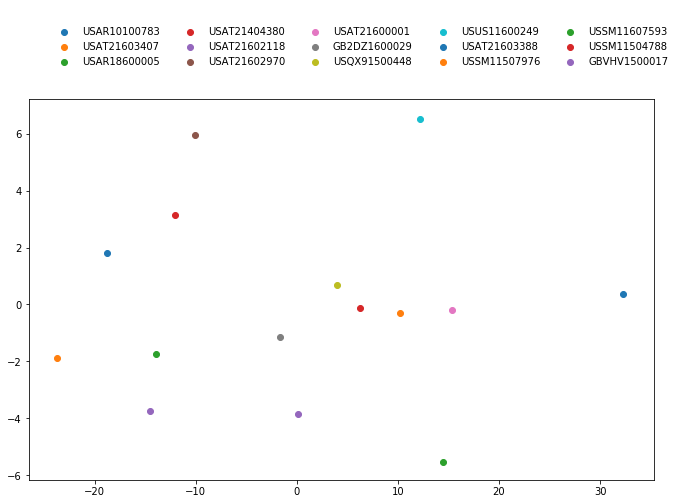

In [161]:
z = pca.transform(X)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7 * 1.6, 7))

for i, vec in enumerate(z):
    ax.scatter(vec[0], vec[1], label=df.iloc[i].name)


plt.legend(loc="best", ncol=5, bbox_to_anchor=(0, 1.02, 1, 0.102),
          frameon=False, borderpad=2)
plt.show()

In [134]:
df.iloc[0].name

'USAR10100783'

In [135]:
df.iloc[1].name

'USAT21603407'

In [136]:
df.iloc[2].name

'USAR18600005'